**churn: stay and not stay**
- churn rate: leaving the company
- superwised learning
    - input columns and target column also availble
    - target column : **churn**
- churn has two labels
    - 0: Stay
    - 1: not stay
- client already encoded
- Maximum days inactive has missing values
    - if you apply average decimal points what is the justification

DATA CLEANING AND ANALYSIS
Read the data
Create categorical and numerical colunms
Data quick checks
a) shape
b) size
c) len
d) head
e) Tail
F) info
g) Data types
Missing value analysis
best method for numerical :KNN Imputer
Draw the distrtibution or box plot if you see lots of outliers fill with Median
Data quality checks or data cleaing
Ex:
(i) some column values has some punctuations
(ii) column is numerical data type but some where cat value availble
(iii) Drop the duplicates
(iv) when required change the data types also
Categorical column analysis
(a) Frequency table
(b) Relative frequency
(c) Bar chart
(d) Pie chart
write your understanding

Numerical column Analysis
(a) Statistical summary
(b) Histogram
(c) Data distribution
write your understanding

Outlier analysis
(a)Box plot
(b) Treat the outliers
Bi variate and Multi variate analysis
(a) How one column impact another column
(b) Correlation
(c) Heat maps
------------ FEATURE ENGINEERING -----------
Encoding: Convert Categorical to Numerical
(a) label encoder
(b) OneHotEncoder
Scalling:
(a)Standardization and
(b) Normalization
Transformation (optional)
-------------- FEATURE SELECTION -----------
Selecting the important freature for ML model
-------DIMENSION REDUCTION METHOD------
A) Principla Component Analysis (PCA)
B) Singular value Decomposition (SVD)
--------------DEVLOP THE ML MODEL-----------
Develop Algorithms
Evalue algorithms
Tune the algorithms
Deploy the models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
telecom_df=pd.read_csv(r'C:\Users\saiprithi\Documents\naresh it\datasience ai\xsel_sheets\telecom_churn_data.csv')
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [4]:
cat=telecom_df.select_dtypes(include='O').columns
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [5]:
num=telecom_df.select_dtypes(exclude='O').columns
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

# data quick check

In [6]:
telecom_df.shape

(2000, 16)

In [7]:
len(telecom_df)

2000

In [8]:
telecom_df.size

32000

In [9]:
telecom_df.head(5)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [10]:
telecom_df.tail(5)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [11]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [12]:
telecom_df.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [13]:
telecom_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

# FILLING MISSING VALUES

In [14]:
telecom_df['gender']=telecom_df['gender'].fillna(telecom_df['gender'].mode()[0])
telecom_df['gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
1995    Female
1996      Male
1997      Male
1998      Male
1999      Male
Name: gender, Length: 2000, dtype: object

In [15]:
telecom_df['maximum_days_inactive']=telecom_df['maximum_days_inactive'].fillna(telecom_df['maximum_days_inactive'].mode()[0])
telecom_df['maximum_days_inactive']

0       4.0
1       3.0
2       4.0
3       3.0
4       3.0
       ... 
1995    4.0
1996    3.0
1997    5.0
1998    3.0
1999    3.0
Name: maximum_days_inactive, Length: 2000, dtype: float64

In [16]:
telecom_df['churn']=telecom_df['churn'].fillna(telecom_df['churn'].mode()[0])
telecom_df['churn']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    1.0
Name: churn, Length: 2000, dtype: float64

In [17]:
telecom_df.isna().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [18]:
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [19]:
telecom_df['phone_no']=telecom_df['phone_no'].str.replace('-', '',regex=False).astype('int64')
telecom_df['phone_no']

0       4098743
1       3405930
2       3723750
3       3314902
4       3518398
         ...   
1995    3857387
1996    3839255
1997    3532080
1998    3597788
1999    4141496
Name: phone_no, Length: 2000, dtype: int64

In [20]:
cat1=telecom_df.select_dtypes(include='O').columns
cat1

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [21]:
len(cat1)

3

# dataframe for cat

In [22]:
for i in range(len(cat1)):
    keys=telecom_df[cat1[i]].value_counts().keys()
    values=telecom_df[cat1[i]].value_counts().values
    cat_data=pd.DataFrame(zip(keys,values),columns=[cat1[0],'count'])
    print(cat_data)

   gender  count
0    Male   1077
1  Female    923
  gender  count
0     no   1802
1    yes    198
  gender  count
0     no   1430
1    yes    570


# barchart

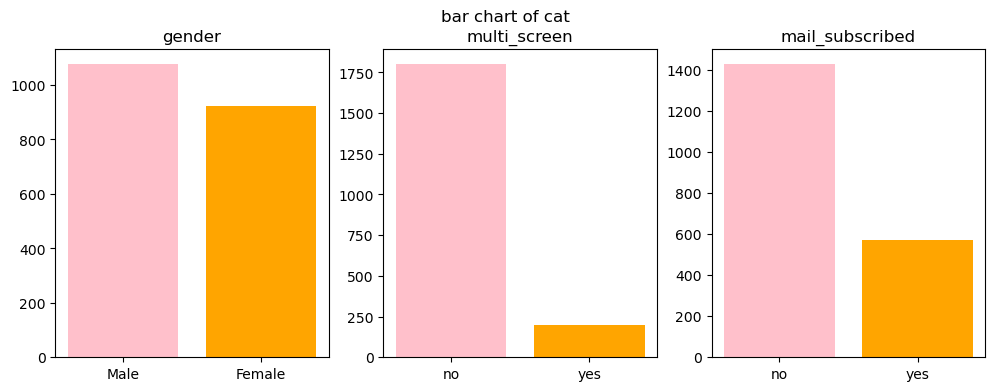

In [23]:
plt.figure(figsize=(12,4))
for i in range(len(cat1)):
    keys=telecom_df[cat1[i]].value_counts().keys()
    values=telecom_df[cat1[i]].value_counts().values
    colur=['pink','orange']
    plt.suptitle('bar chart of cat')
    plt.subplot(1,3,i+1).bar(keys,values,color=colur)
    plt.title(f'{cat1[i]}')

## piechart

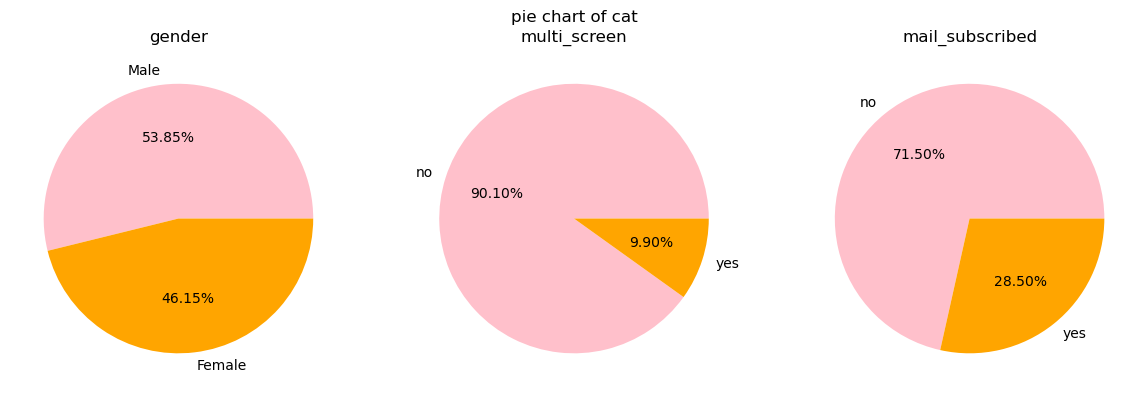

In [24]:
plt.figure(figsize=(12,4))
for i in range(len(cat1)):
    keys=telecom_df[cat1[i]].value_counts().keys()
    values=telecom_df[cat1[i]].value_counts().values
    colur=['pink','orange']
    plt.suptitle('pie chart of cat')
    plt.subplot(1,3,i+1).pie(x=values,labels=keys,autopct='%0.2f%%',colors=colur)
    plt.title(f'{cat1[i]}')
plt.tight_layout()
plt.show()

# numerical analysis

In [25]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [26]:
len(num)

12

# boxplot

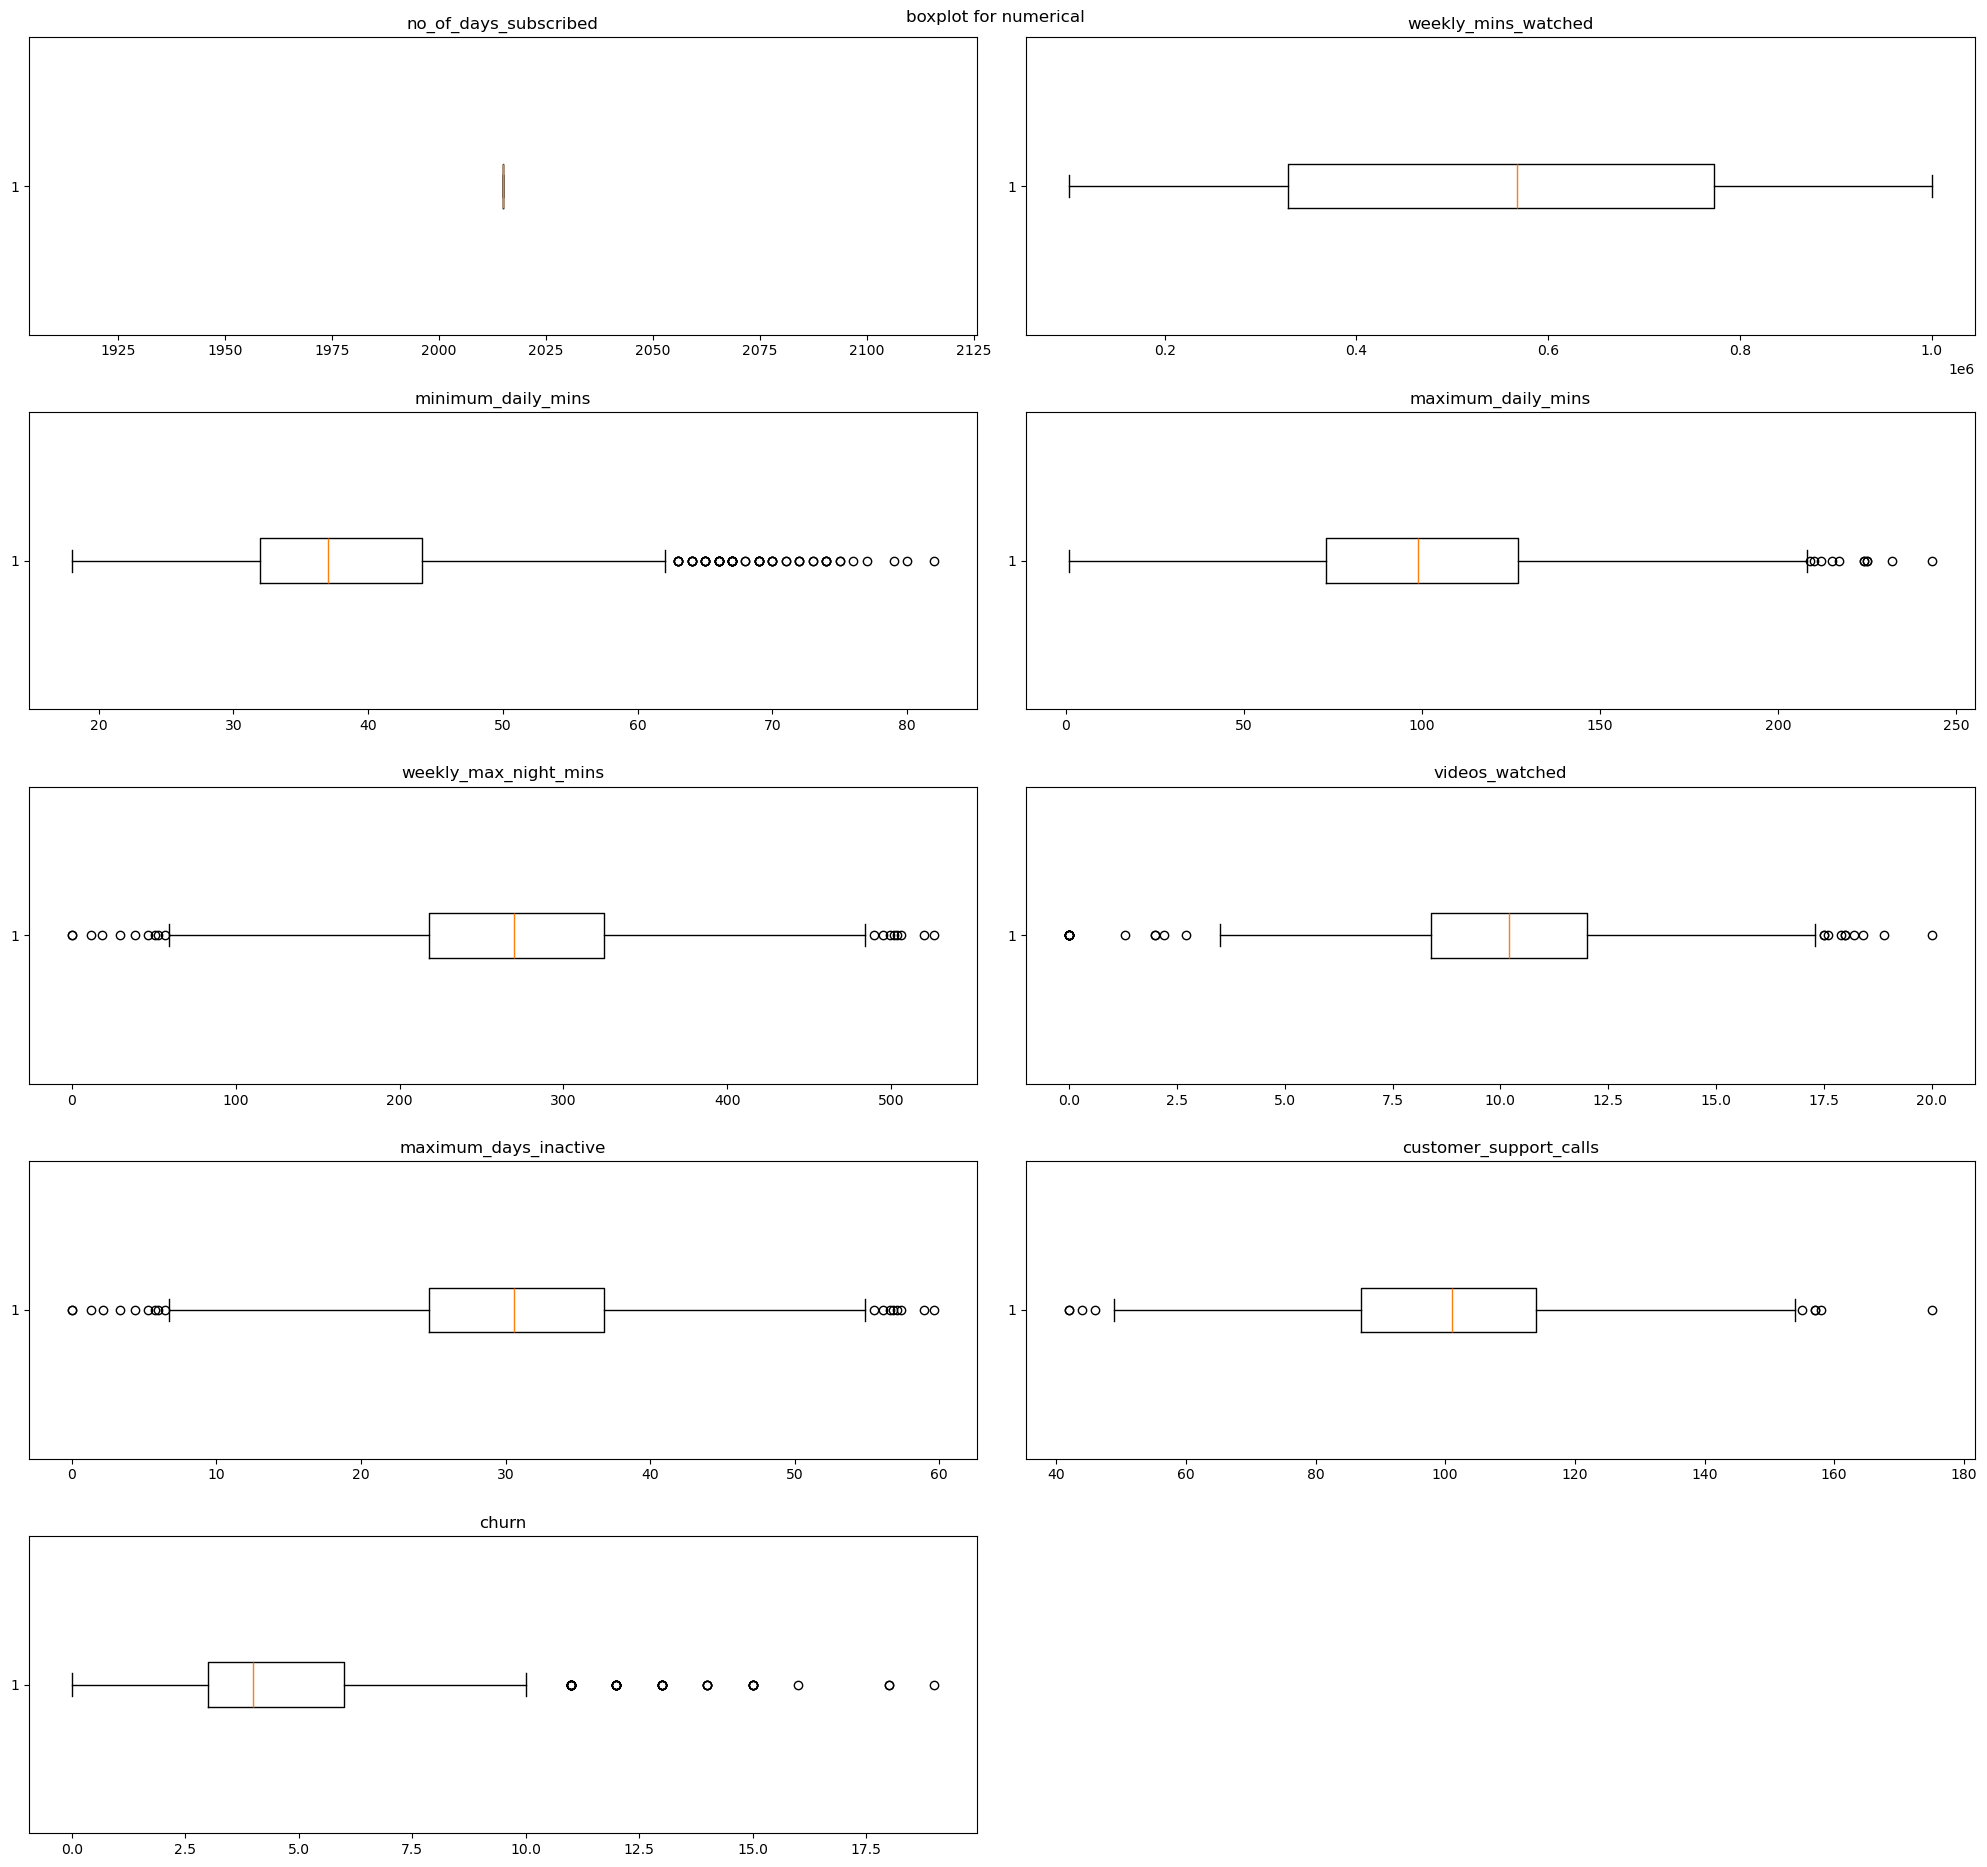

In [27]:
plt.figure(figsize=(20,19))
plt.suptitle('boxplot for numerical')
for i in range(len(num[3:])):
    plt.subplot(5,2,i+1).boxplot(telecom_df[num[i]],vert=False)
    plt.title(num[3:][i])
plt.tight_layout()   
plt.show()

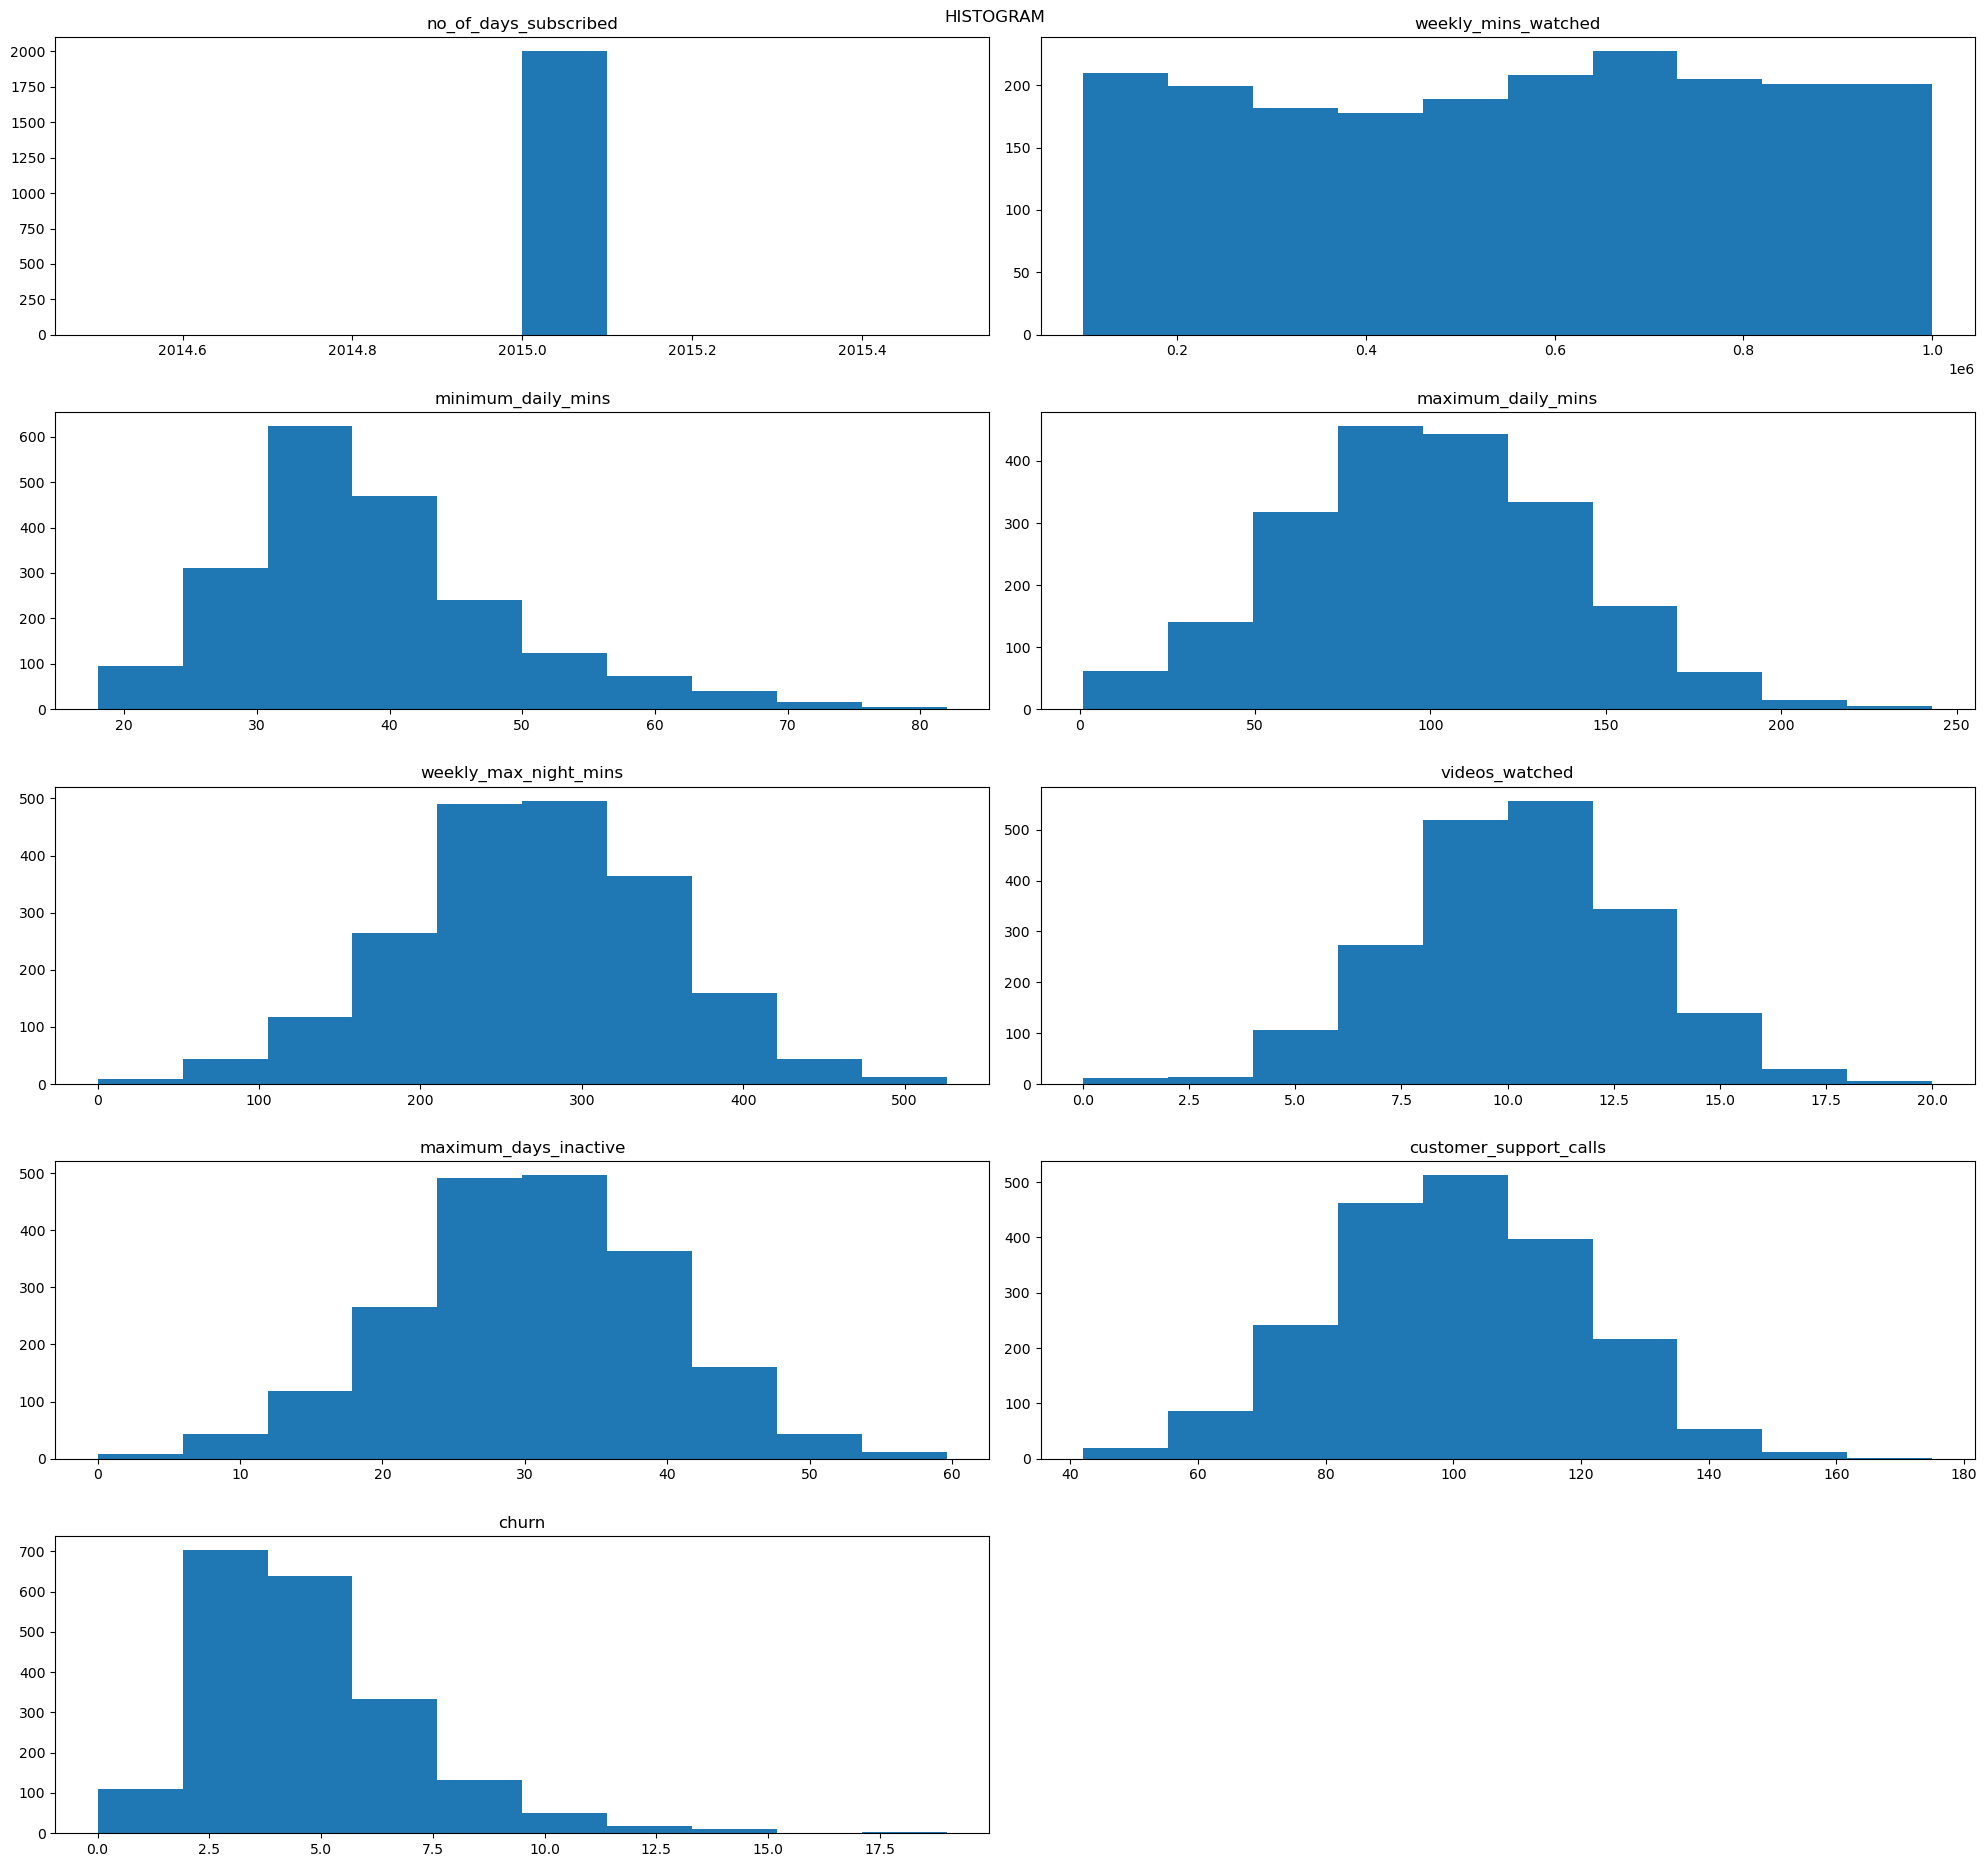

In [28]:
plt.figure(figsize=(20,19))
plt.suptitle('HISTOGRAM')
for i in range(len(num[3:])):
    plt.subplot(5,2,i+1).hist(telecom_df[num[i]])
    plt.title(num[3:][i])
plt.tight_layout()   
plt.show()

In [29]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

# outlier analysis

In [30]:
print('outliers are')
summ=0
for i in num[2:]:
    q1=np.percentile(telecom_df[i],25)
    q3=np.percentile(telecom_df[i],75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    up=q3+1.5*iqr
    cond=(telecom_df[i]<lb) | (telecom_df[i]>up)
    coun=len(telecom_df[cond])
    summ=summ+coun
    print(f'{i}:{coun}')
print(summ)

outliers are
age:63
no_of_days_subscribed:11
weekly_mins_watched:18
minimum_daily_mins:25
maximum_daily_mins:18
weekly_max_night_mins:9
videos_watched:51
maximum_days_inactive:24
customer_support_calls:161
churn:262
642


# non-outliers analysis

In [31]:
print('non-outliers are')
summ=0
for i in num[2:]:
    q1=np.percentile(telecom_df[i],25)
    q3=np.percentile(telecom_df[i],75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    up=q3+1.5*iqr
    cond=(telecom_df[i]>=lb) & (telecom_df[i]<=up)
    non_out=telecom_df[cond]
    coun=len(non_out)
    summ=summ+coun
    print(f'{i}:{coun}')
print(summ)

non-outliers are
age:1937
no_of_days_subscribed:1989
weekly_mins_watched:1982
minimum_daily_mins:1975
maximum_daily_mins:1982
weekly_max_night_mins:1991
videos_watched:1949
maximum_days_inactive:1976
customer_support_calls:1839
churn:1738
19358


In [32]:
non_out

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,4098743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,3405930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
3,2015,101595,3314902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,3518398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
6,2015,103051,4161845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2015,996524,3519604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,0.0
1995,2015,997132,3857387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,998086,3839255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,3532080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0


# outliers are filling with median

In [33]:
print('outliers filling mode')
for i in num[2:]:
    q1=np.percentile(telecom_df[i],25)
    q3=np.percentile(telecom_df[i],75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    up=q3+1.5*iqr
    cond=(telecom_df[i]<lb) & (telecom_df[i]>up)
    non_out=telecom_df[cond]
    median=telecom_df[i].median()
    telecom_df[i]=np.where(cond,median,telecom_df[i])
telecom_df
    

outliers filling mode


,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,4098743,Female,36.0,62.0,no,no,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0.0
1,2015,100643,3405930,Female,39.0,149.0,no,no,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0.0
2,2015,100756,3723750,Female,65.0,126.0,no,no,87.30,11.9,9.89,91.0,1.0,4.0,5.0,1.0
3,2015,101595,3314902,Female,24.0,131.0,no,yes,321.30,9.5,36.41,102.0,4.0,3.0,3.0,0.0
4,2015,101653,3518398,Female,40.0,191.0,no,no,243.00,10.9,27.54,83.0,7.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,3857387,Female,54.0,75.0,no,yes,182.25,11.3,20.66,97.0,5.0,4.0,2.0,0.0
1996,2015,998086,3839255,Male,45.0,127.0,no,no,273.45,9.3,30.99,116.0,3.0,3.0,1.0,0.0
1997,2015,998474,3532080,Male,53.0,94.0,no,no,128.85,15.6,14.60,110.0,16.0,5.0,0.0,0.0
1998,2015,998934,3597788,Male,40.0,94.0,no,no,178.05,10.4,20.18,100.0,6.0,3.0,3.0,0.0


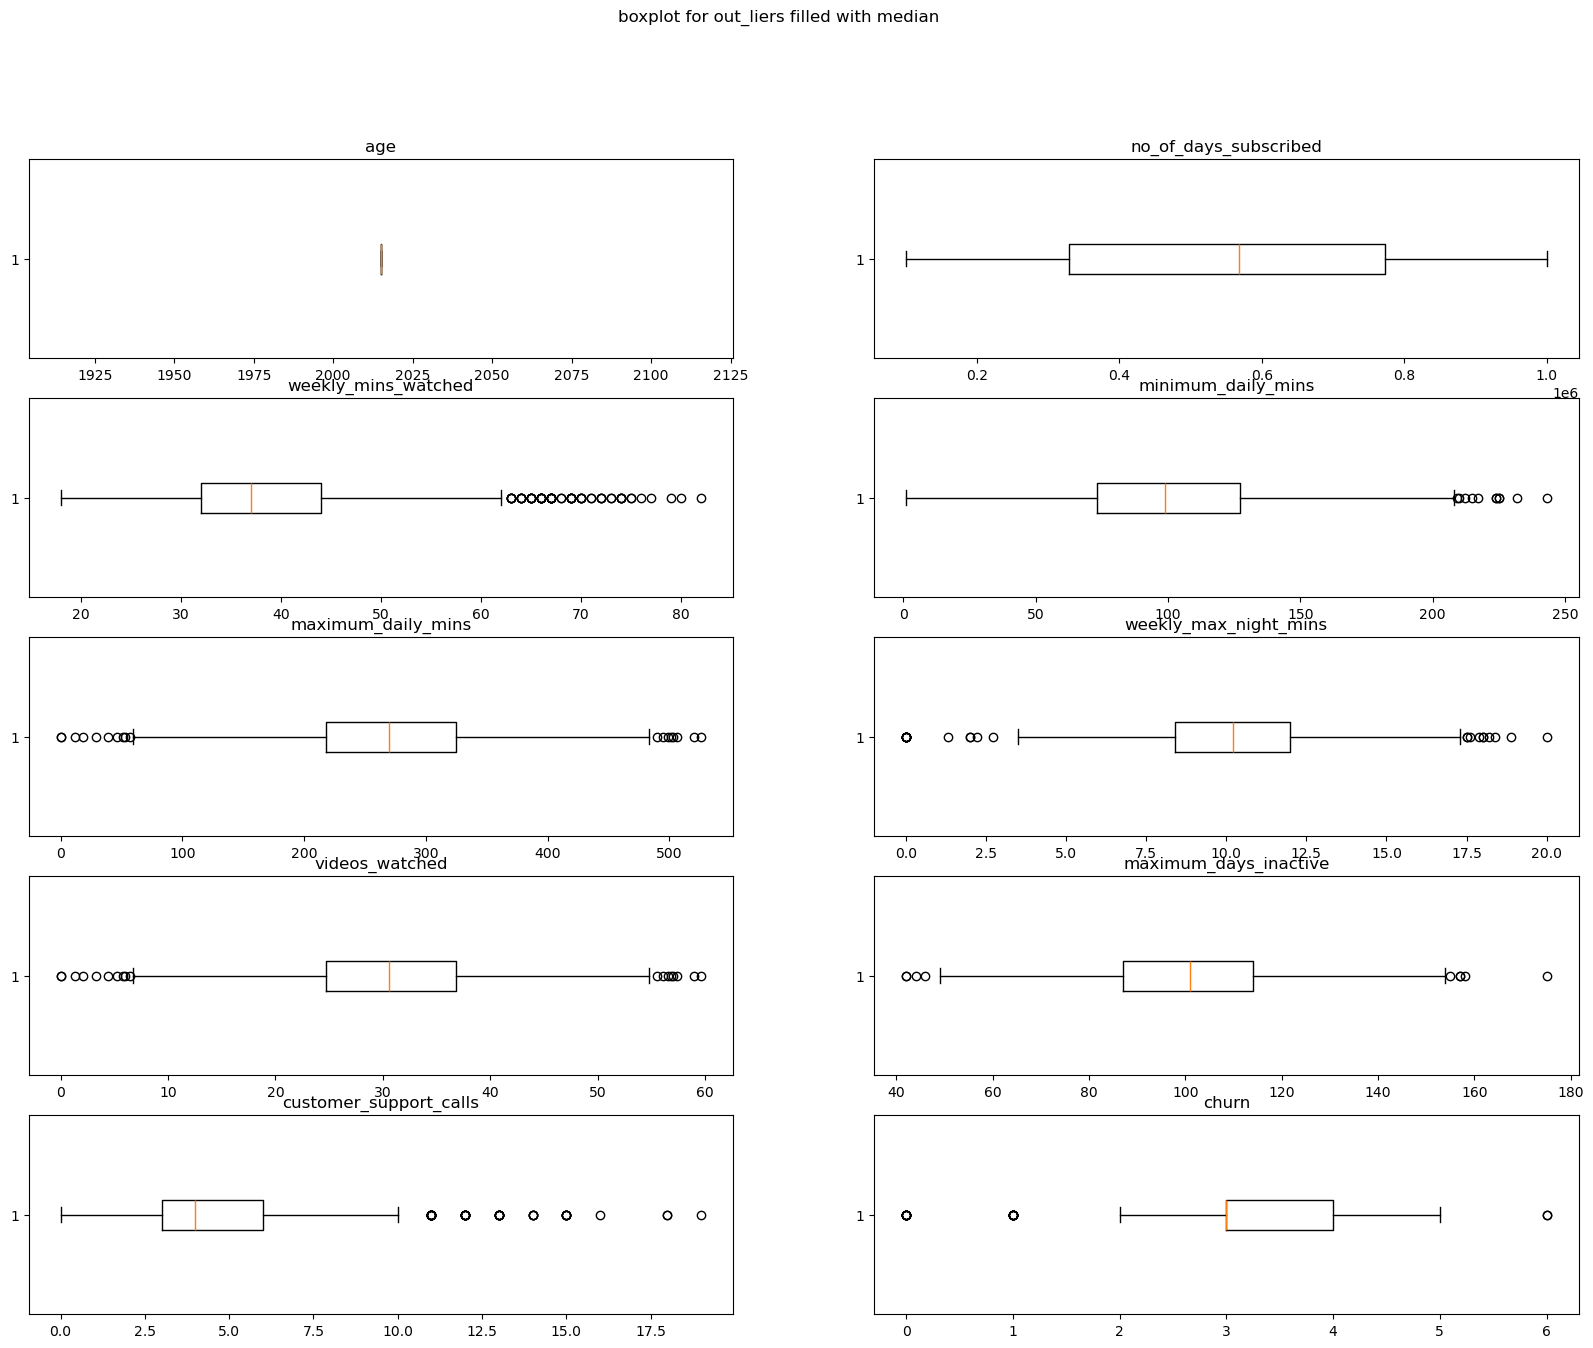

In [34]:
plt.figure(figsize=(20,15))
plt.suptitle('boxplot for out_liers filled with median')
for i in range(len(num[2:])):
     plt.subplot(5,2,i+1).boxplot(telecom_df[num[i]],vert=False)
     plt.title(num[2:][i])
plt.show()

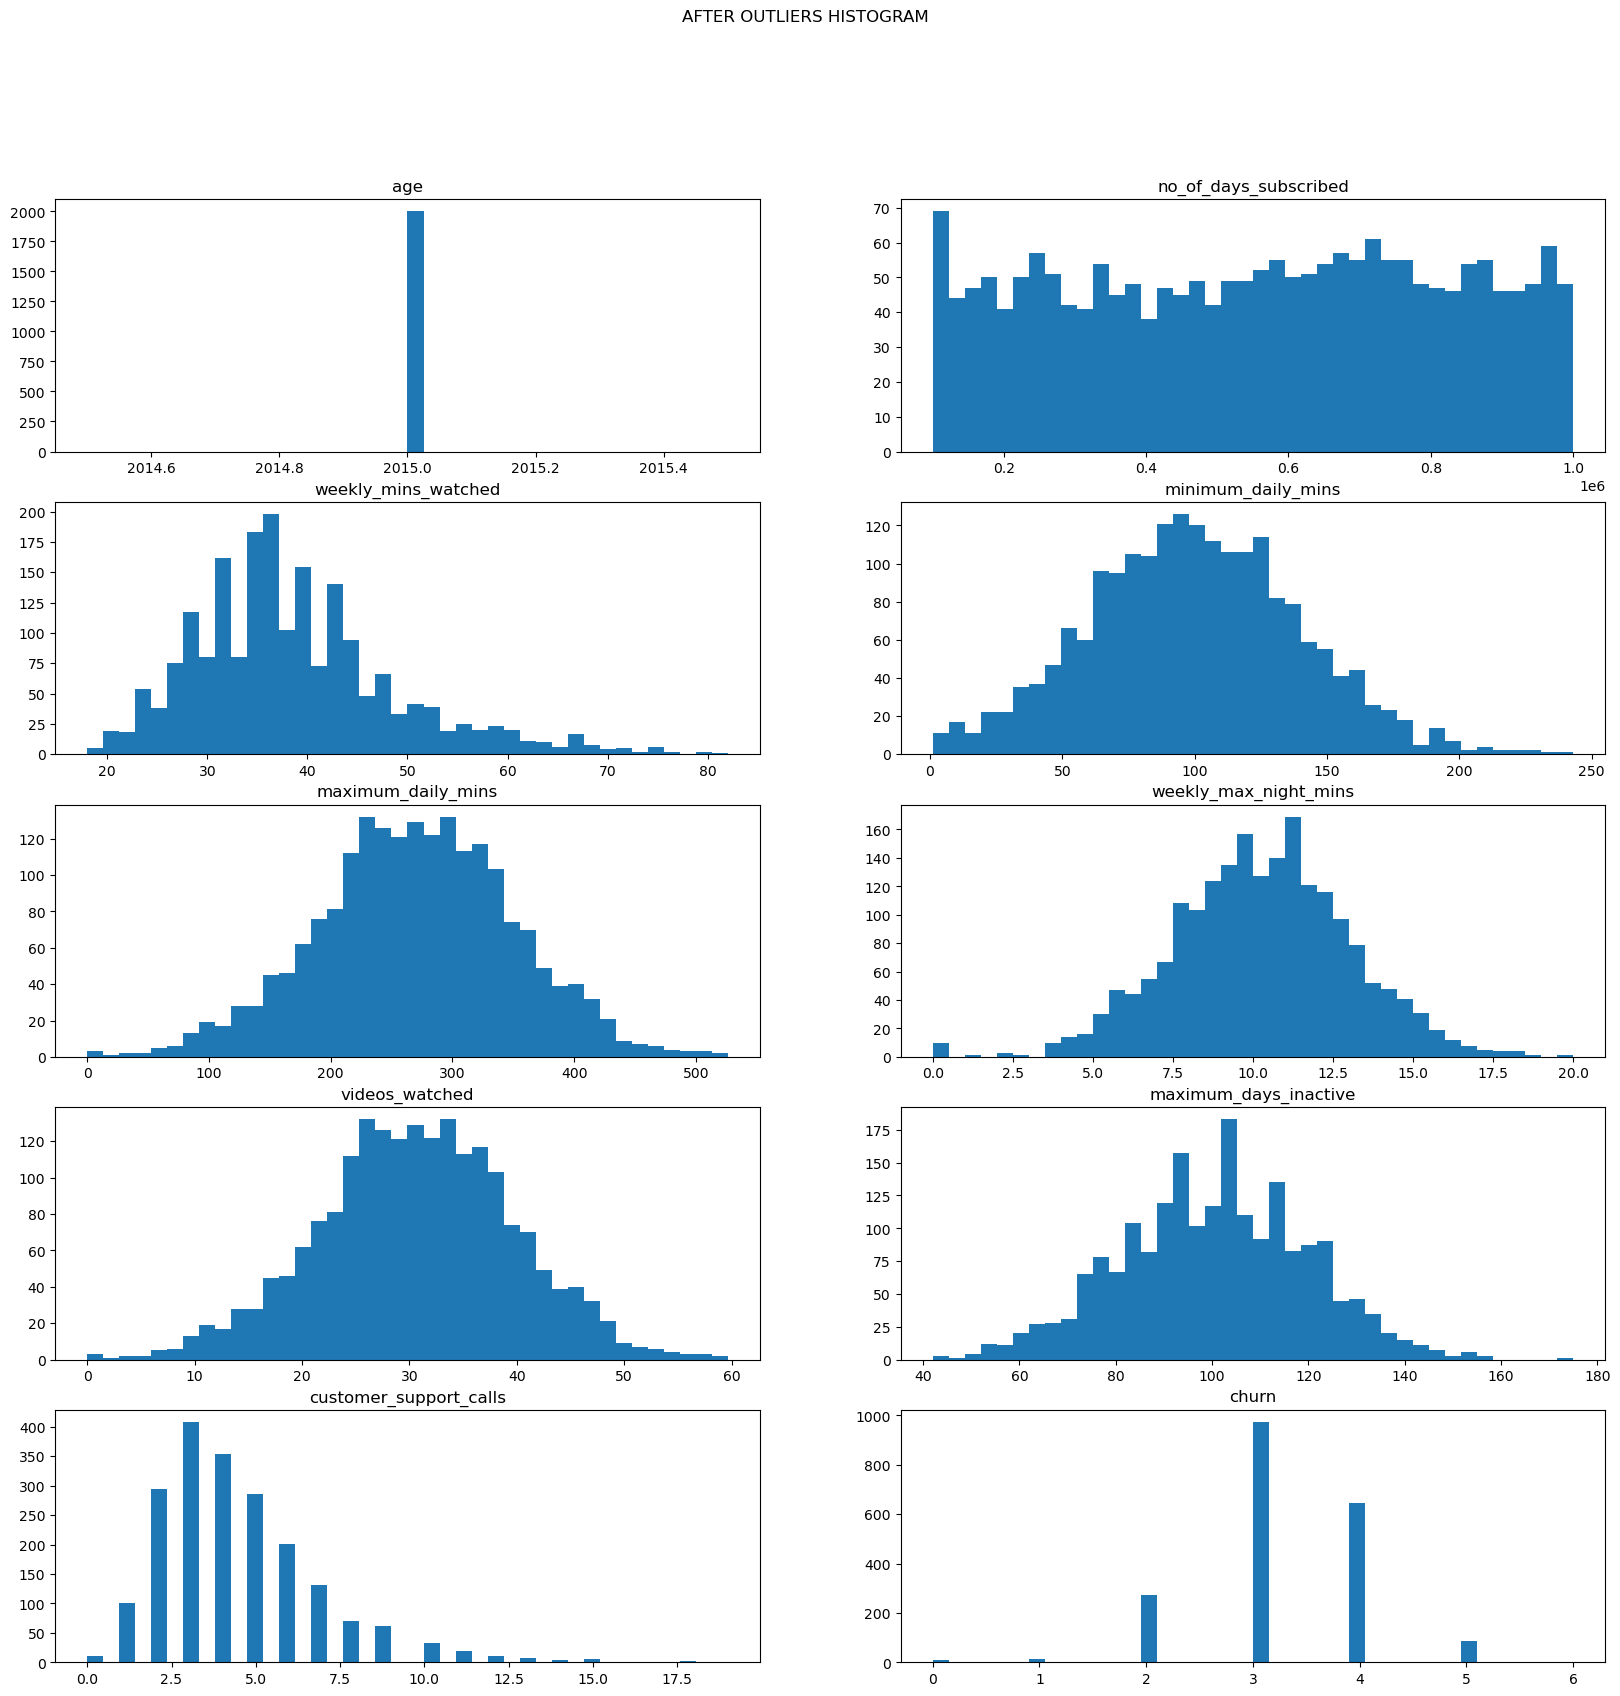

In [35]:
plt.figure(figsize=(20,19))
plt.suptitle('AFTER OUTLIERS HISTOGRAM')
for i in range(len(num[2:])):
    plt.subplot(5,2,i+1).hist(telecom_df[num[i]],bins=40)
    plt.title(num[2:][i])

plt.show()

# bi variate and multivariate analysis


#  correlation

In [36]:
telecom_df[3:].corr(numeric_only=True)

,year,customer_id,phone_no,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,NaN,1.000000,0.017838,0.025976,-0.010662,-0.016937,0.034203,-0.016942,0.007892,0.061211,0.048569,-0.033922,-0.050073
phone_no,NaN,0.017838,1.000000,-0.009685,0.008926,0.015278,-0.015425,0.015274,0.011907,-0.015802,-0.007867,0.044560,0.026427
age,NaN,0.025976,-0.009685,1.000000,0.037917,0.019110,-0.001358,0.019123,0.017190,0.014748,0.005265,-0.002839,0.008439
no_of_days_subscribed,NaN,-0.010662,0.008926,0.037917,1.000000,0.000504,0.017044,0.000499,-0.001831,0.019617,0.019687,0.012171,0.001726
weekly_mins_watched,NaN,-0.016937,0.015278,0.019110,0.000504,1.000000,-0.015996,1.000000,0.036640,0.016104,-0.012226,-0.034357,0.166168
minimum_daily_mins,NaN,0.034203,-0.015425,-0.001358,0.017044,-0.015996,1.000000,-0.015994,0.008615,0.051480,0.923798,-0.004452,0.065966
maximum_daily_mins,NaN,-0.016942,0.015274,0.019123,0.000499,1.000000,-0.015994,1.000000,0.036640,0.016106,-0.012226,-0.034363,0.166167
weekly_max_night_mins,NaN,0.007892,0.011907,0.017190,-0.001831,0.036640,0.008615,0.036640,1.000000,-0.001505,0.027151,-0.003415,0.007238
videos_watched,NaN,0.061211,-0.015802,0.014748,0.019617,0.016104,0.051480,0.016106,-0.001505,1.000000,0.035204,0.000452,-0.017947


# scatter plot

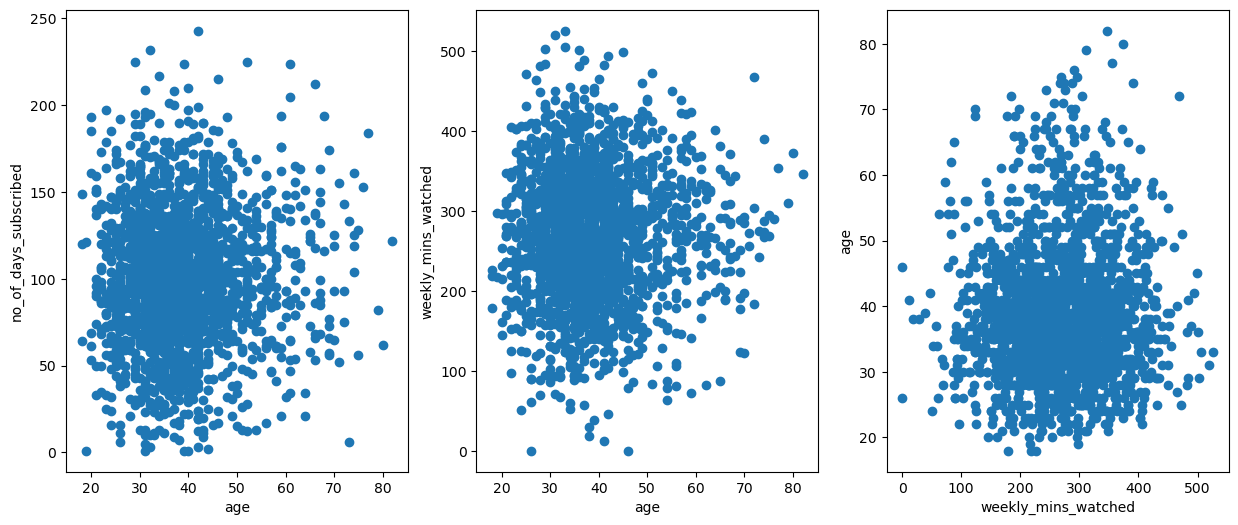

In [41]:
x=telecom_df['age']
y=telecom_df['no_of_days_subscribed']
z=telecom_df['weekly_mins_watched']
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('no_of_days_subscribed')
plt.subplot(1,3,2)
plt.scatter(x,z)
plt.xlabel('age')
plt.ylabel('weekly_mins_watched')
plt.subplot(1,3,3)
plt.scatter(z,x)
plt.xlabel('weekly_mins_watched')
plt.ylabel('age')

plt.show()


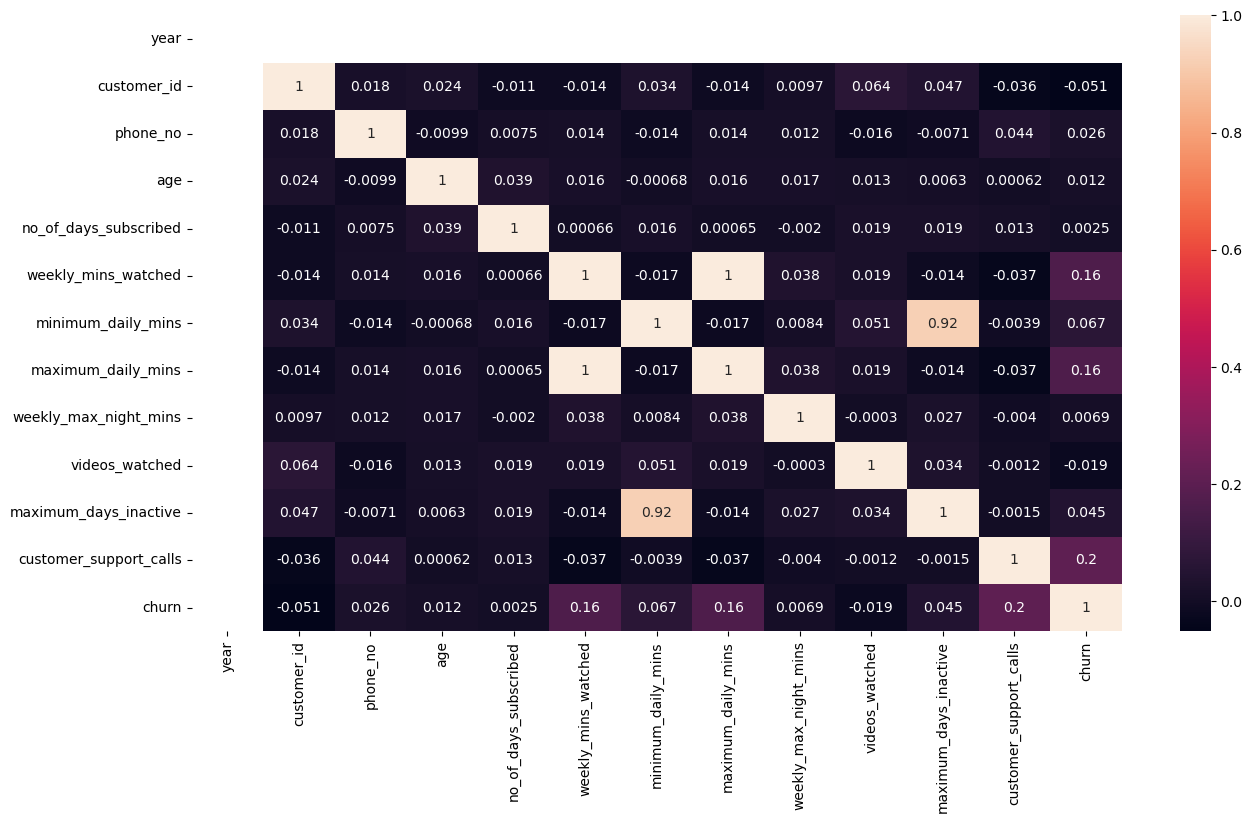

In [46]:
cor=telecom_df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True)
plt.show()

In [47]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [50]:
telecom_df=pd.read_csv(r'C:\Users\saiprithi\Documents\naresh it\datasience ai\xsel_sheets\telecom_churn_data.csv')

from sklearn.preprocessing import LabelEncoder
for i in cat[1:]:
    le=LabelEncoder()
    telecom_df[i]=le.fit_transform(telecom_df[i])
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,1,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,2,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,1,40,94,0,0,178.05,10.4,20.18,100,6,NaN,3,0.0
